# Affronter

The cell below just sets ups the directories for the project

In [1]:
from pathlib import Path

project_dir = Path.cwd().parent
upper_dir = project_dir.parent.parent
resources_dir = upper_dir / "VS Code Resources" / "Baeuda Resources"

# Notebook starts here

Importing the necessary libraries

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
import numpy as np

Showing a random image from the faces folder

In [3]:
face_dir = resources_dir / "Face"

image_super_list = []
face_list = []

for folder in face_dir.iterdir():
    face_list.append(folder.name)
    image_sub_list = []
    for image in folder.iterdir():
        image_sub_list.append(image)
    image_super_list.append(image_sub_list)

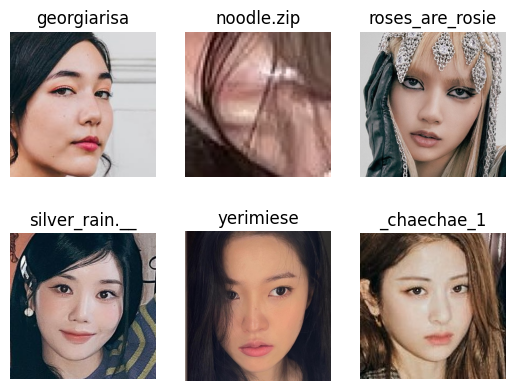

In [4]:
plt.figure()
for i in range(0,6):
    j = np.random.randint(0, len(image_super_list[i]))
    to_display = PIL.Image.open(str(image_super_list[i][j]))
    ax = plt.subplot(2, 3, i + 1)
    plt.title(face_list[i])
    plt.axis("off")
    plt.imshow(to_display)

In [5]:
import_dataset = tf.keras.utils.image_dataset_from_directory(face_dir, batch_size=24, image_size = (256,256),label_mode='int',)
class_names = import_dataset.class_names

Found 7825 files belonging to 6 classes.


In [6]:
scaled_dataset = import_dataset.map(lambda x, y: (x/255, y))
dataset_size = len(scaled_dataset)

train_size = int(dataset_size*0.8)
validation_size = int(dataset_size*0.1)
test_size = int(dataset_size*0.1)

while train_size + validation_size + test_size < dataset_size:
    train_size += 1

print(dataset_size)
print(train_size)
print(validation_size)
print(test_size)

327
263
32
32


In [7]:
import_iterator = import_dataset.as_numpy_iterator()
scaled_iterator = scaled_dataset.as_numpy_iterator()

In [8]:
train_set = scaled_dataset.take(train_size)
validation_set = scaled_dataset.skip(train_size).take(validation_size)
test_set = scaled_dataset.skip(train_size+validation_size).take(test_size)

# Creation of the CNN

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3),1, activation='relu', input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, (3,3),1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3,3),1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='sigmoid')
])

model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [10]:
epochs = 10

history = model.fit(train_set,epochs=epochs, validation_data=validation_set)


Epoch 1/10
263/263 [==============================] - 133s 504ms/step - loss: 1.5254 - accuracy: 0.3880 - val_loss: 1.3901 - val_accuracy: 0.4544
Epoch 2/10
263/263 [==============================] - 143s 542ms/step - loss: 1.2171 - accuracy: 0.5219 - val_loss: 1.2626 - val_accuracy: 0.5039
Epoch 3/10
263/263 [==============================] - 83s 316ms/step - loss: 0.9545 - accuracy: 0.6291 - val_loss: 1.2735 - val_accuracy: 0.5417
Epoch 4/10
263/263 [==============================] - 84s 319ms/step - loss: 0.6744 - accuracy: 0.7384 - val_loss: 1.4577 - val_accuracy: 0.5612
Epoch 5/10
263/263 [==============================] - 86s 325ms/step - loss: 0.4546 - accuracy: 0.8273 - val_loss: 1.5633 - val_accuracy: 0.5625
Epoch 6/10
263/263 [==============================] - 92s 347ms/step - loss: 0.3320 - accuracy: 0.8853 - val_loss: 1.8511 - val_accuracy: 0.5703
Epoch 7/10
263/263 [==============================] - 84s 317ms/step - loss: 0.2465 - accuracy: 0.9156 - val_loss: 1.9592 - val_

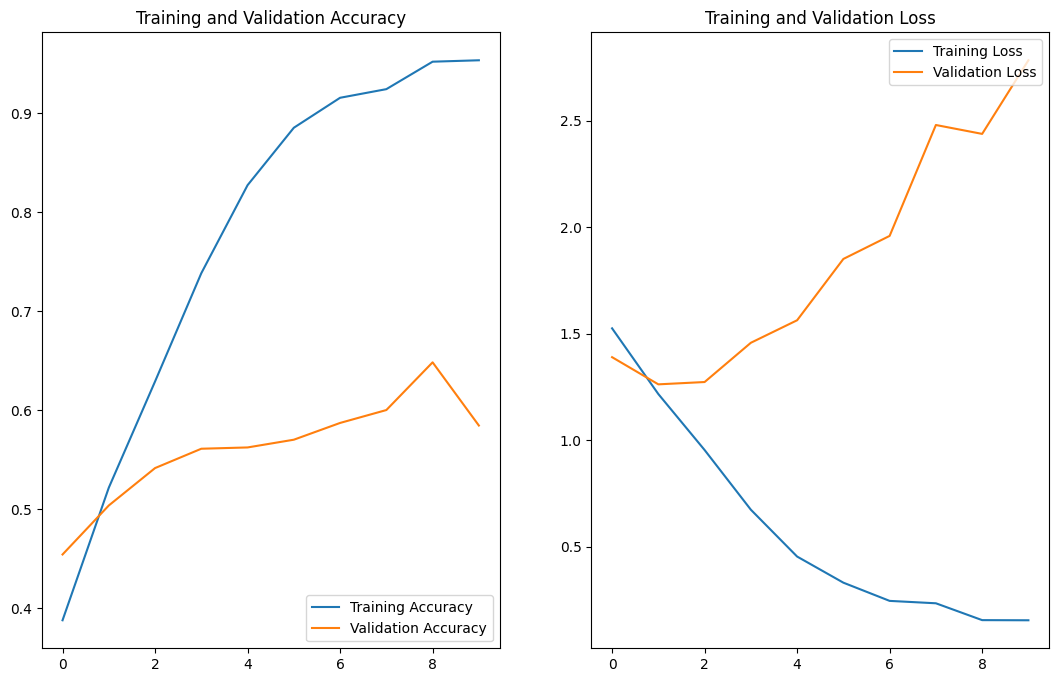

In [11]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(13, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.close()

In [12]:
test_iterator = test_set.as_numpy_iterator()

In [48]:
test_data = test_iterator.next()

24
1/1 [==============================] - 0s 24ms/step


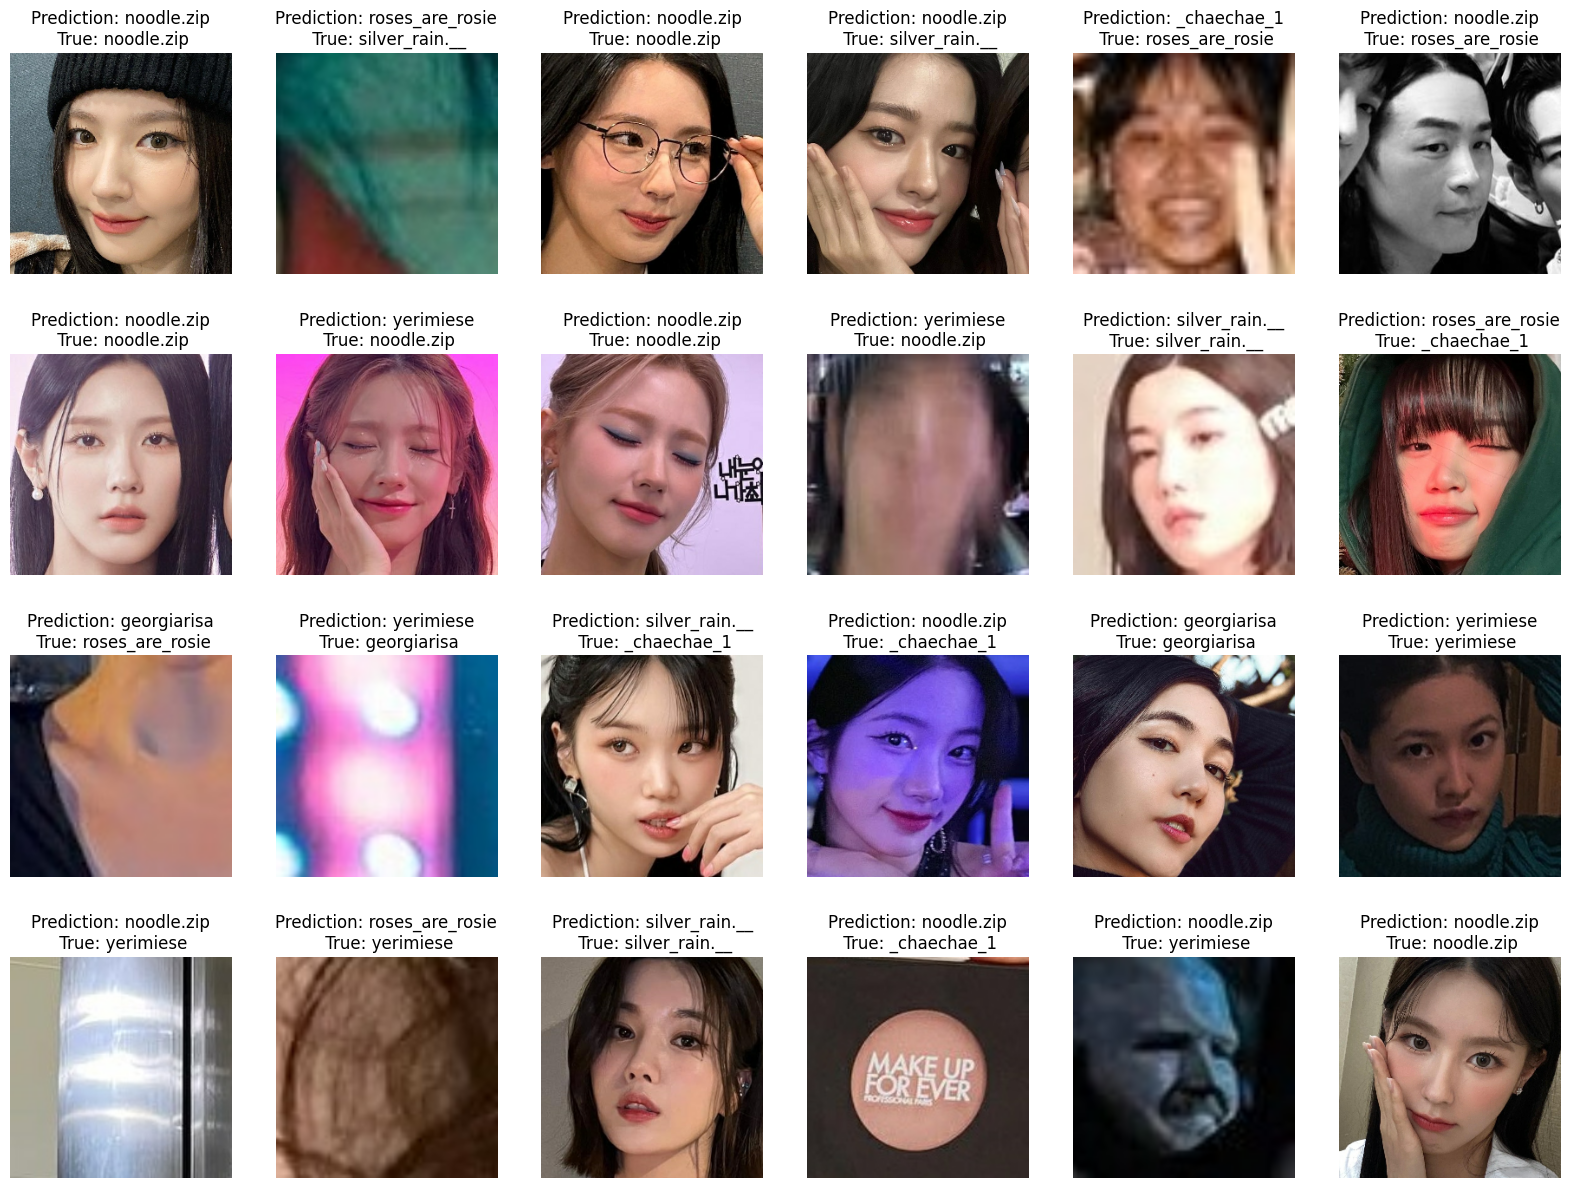

In [49]:
count = 0

print(len(test_data[0]))

plt.figure(figsize=(20,15))
while count < len(test_data[0]):
    ax = plt.subplot(4,6, count+1)
    plt.imshow(test_data[0][count])
    plt.title(f"Prediction: {class_names[np.argmax(model.predict(np.array([test_data[0][count]])))]}\n True: {class_names[test_data[1][count]]}")
    plt.axis("off")
    count += 1

2


In [51]:
import os
model_folder_dir = resources_dir / "Model"

if not model_folder_dir.exists():
    os.mkdir(model_folder_dir)

In [52]:
model_dir = model_folder_dir / "FaceClassifier.h5"
model.save(model_dir)

d:\Projects\VS Code\Baeuda\venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<class 'PIL.JpegImagePlugin.JpegImageFile'>


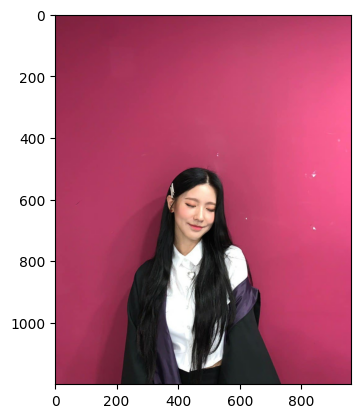

In [89]:
input_image = resources_dir / "Miy1.jpg"

image_file = PIL.Image.open(str(input_image))

plt.imshow(image_file)
print(type(image_file))

1/1 [==============================] - 0s 83ms/step
Image contains georgiarisa


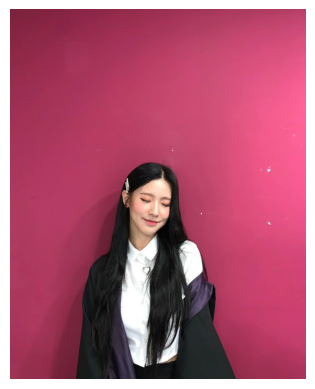

In [90]:
reshaped = image_file.resize((256,256))
numpy_array = np.array(reshaped)
#plt.imshow(reshaped)
#print(type(image_file))

numpy_array = numpy_array/255
#print(numpy_array)

model_input = np.array([numpy_array])
prediction = np.argmax(model.predict(model_input))

plt.imshow(image_file)
plt.axis("off")
print(f"Image contains {class_names[prediction]}")

In [91]:
test_predictions= model.predict(test_set)

32/32 [==============================] - 5s 62ms/step


In [92]:
print(test_predictions)

[[1.3917161e-02 6.9093844e-04 1.0000000e+00 4.7143628e-03 9.7756231e-01
  7.5797701e-01]
 [9.9871391e-01 4.4368193e-01 9.8666906e-01 9.3073434e-01 8.6807829e-01
  3.6854137e-02]
 [3.4542310e-01 7.9028785e-01 9.9643064e-01 9.9816483e-01 1.7247600e-02
  9.7747284e-01]
 ...
 [4.4215085e-06 1.1533138e-05 9.9995661e-01 9.9999404e-01 1.6368385e-01
  9.2358983e-01]
 [2.6113328e-05 2.9433977e-05 9.9999976e-01 9.9993861e-01 9.9992794e-01
  8.6028963e-01]
 [6.2531531e-02 3.7729564e-01 8.4438503e-01 9.0274668e-01 2.6312765e-01
  6.1962974e-01]]
